In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)

# Define x & y dataset
y = pd.DataFrame(df_["Potability_det"])
x = df_.drop(["Potability_det"], axis=1)

mean = x.mean(axis=0)
x = x-mean

scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

x_normalized = pd.DataFrame(scaler_m.fit_transform(x), columns=x.columns)
x_standardized = pd.DataFrame(scaler_s.fit_transform(x), columns=x.columns)

In [4]:
initial_centroids = x.sample(n=2).values

model = KMeans(n_clusters=2, init=initial_centroids, n_init=1)  # Could be change (1, 2, ..., 9)
model.fit(x)
x["cluster"] = model.labels_
x["Potability"] = y["Potability_det"]

C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


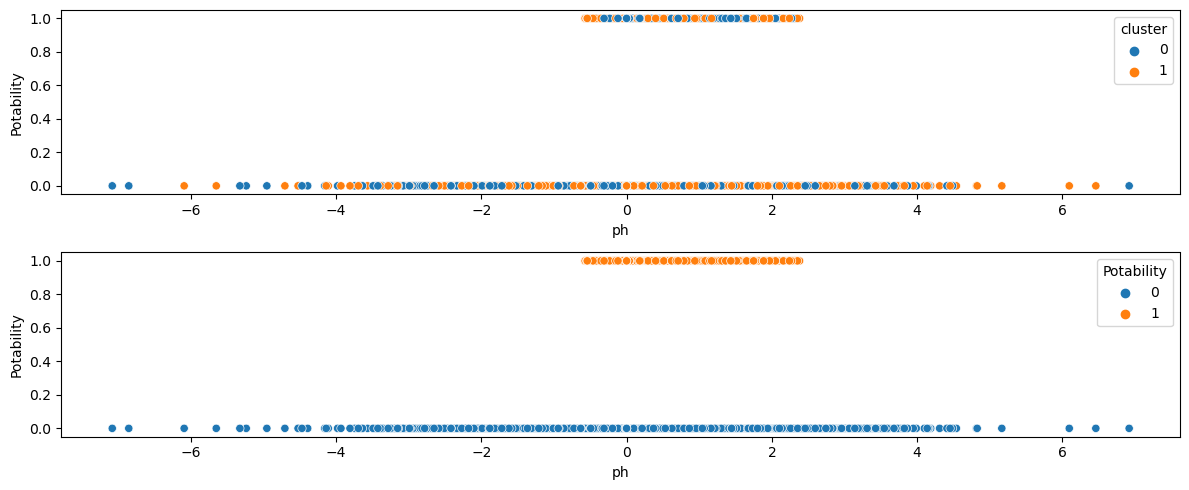

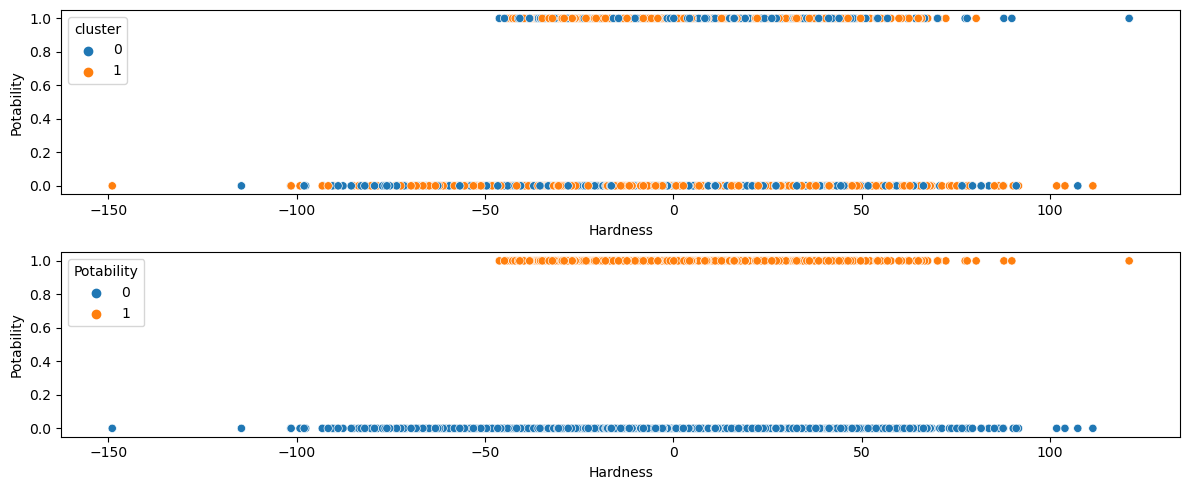

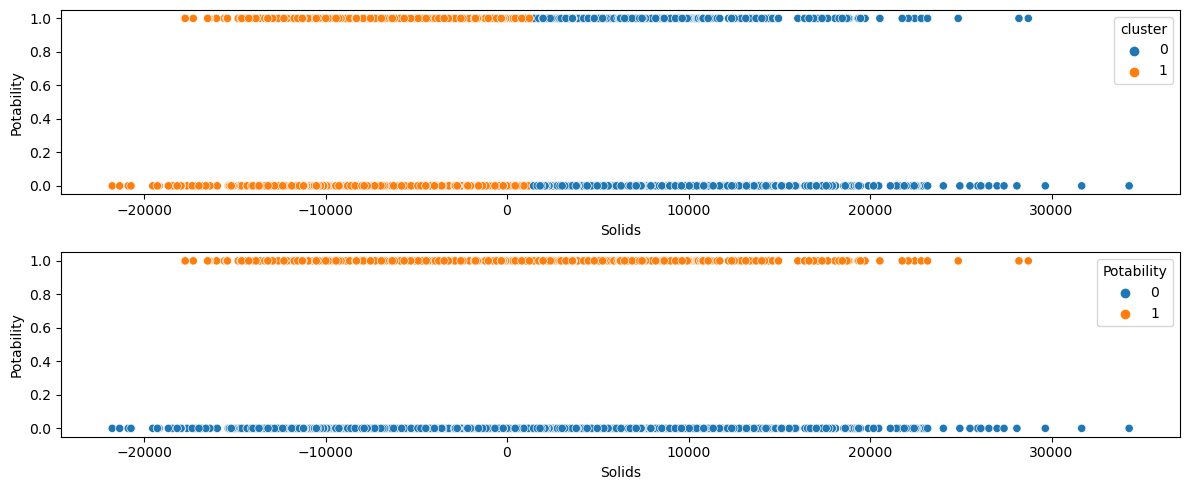

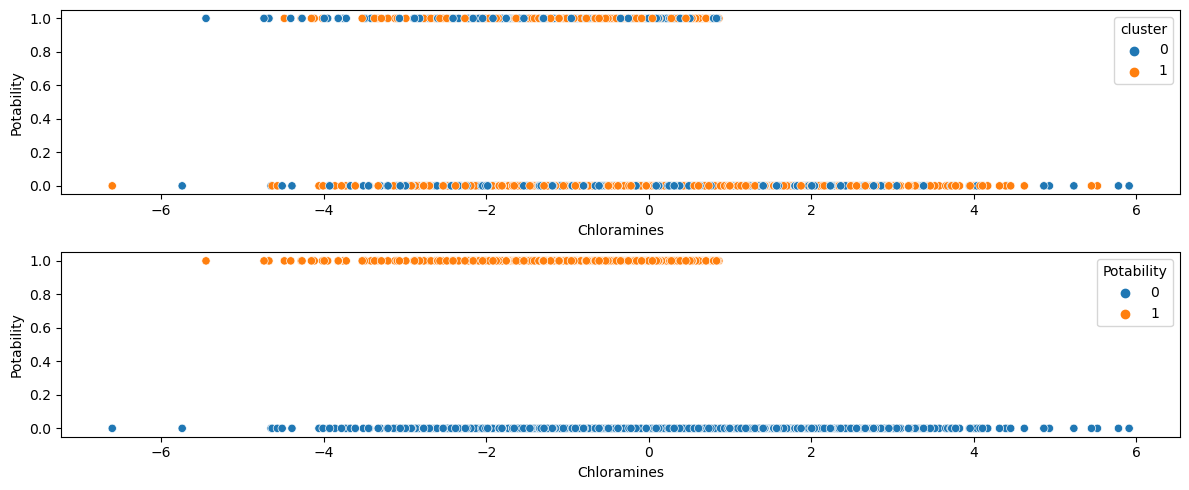

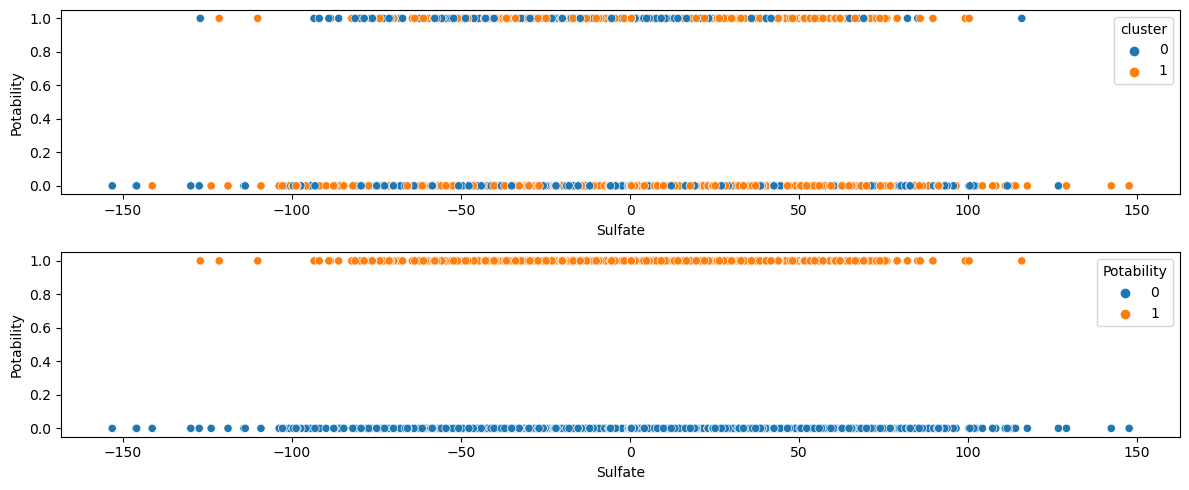

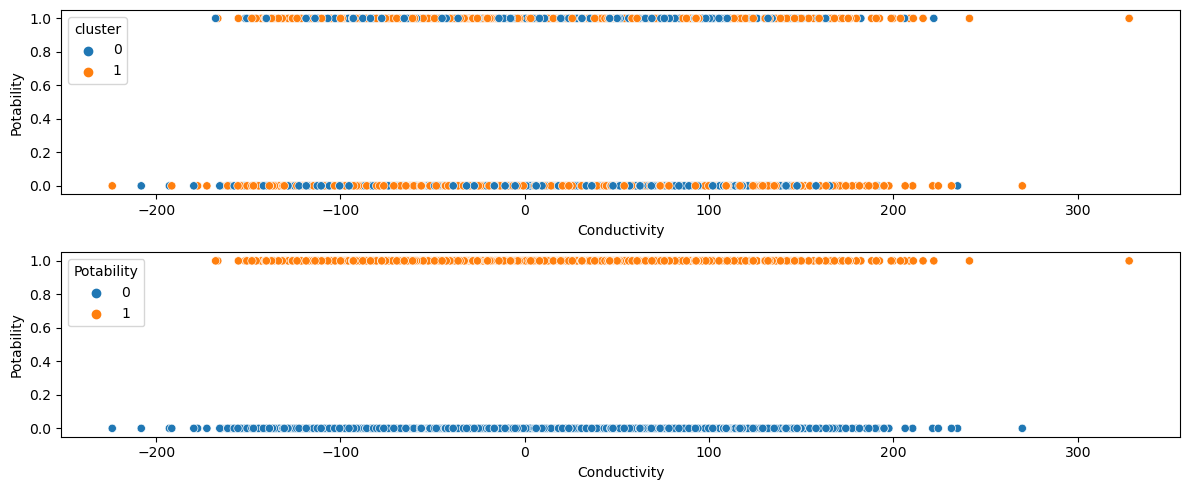

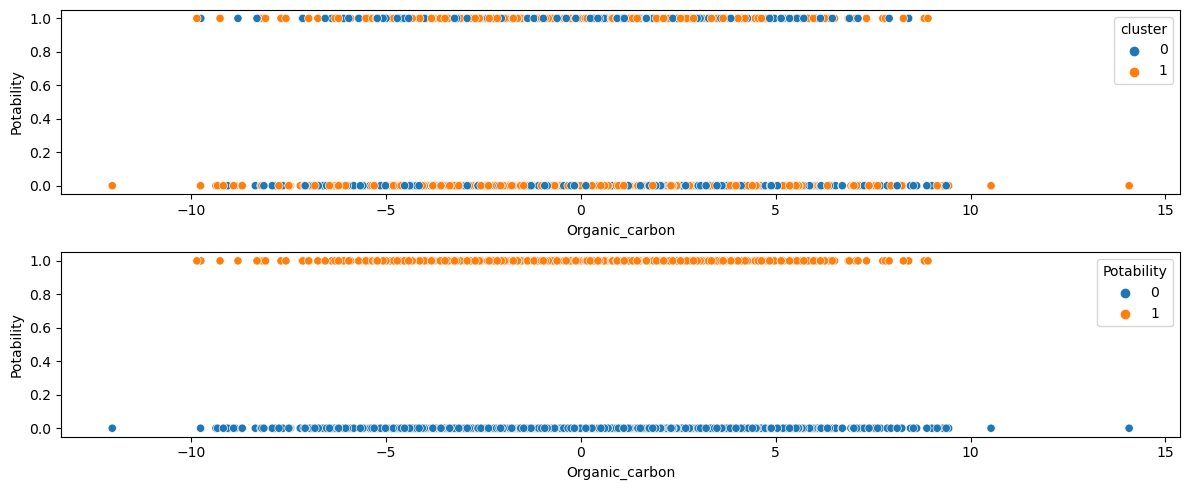

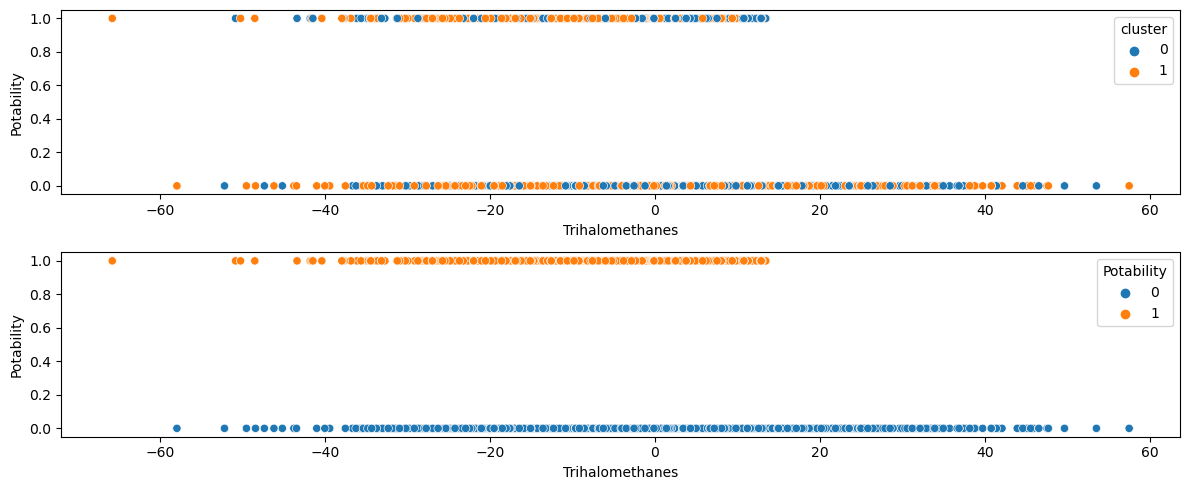

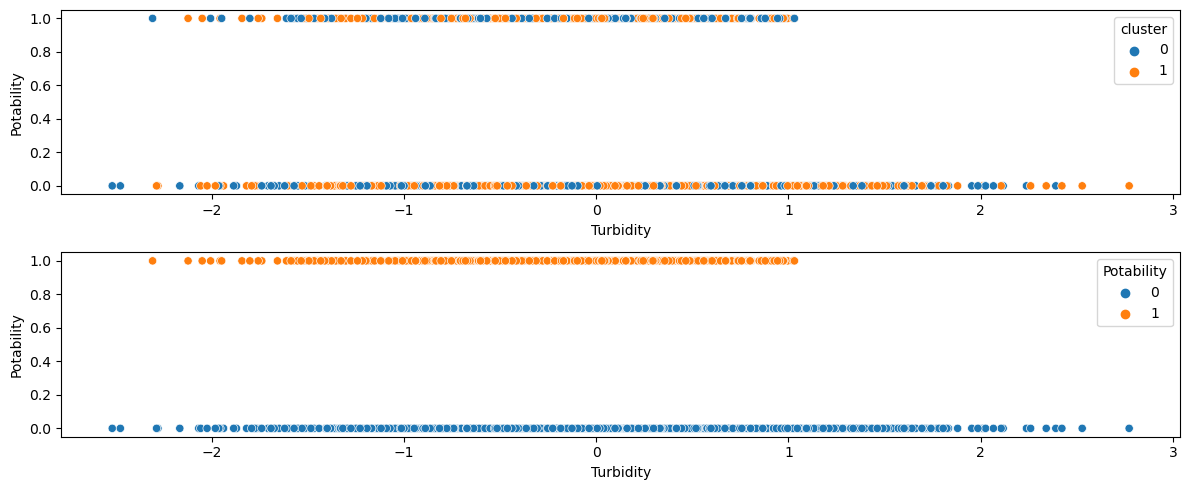

In [5]:
for var in ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]:
    fig, axes = plt.subplots(2, 1, figsize=(12, 5))

    # Scatter plot
    sns.scatterplot(data=x, x=var, y="Potability", hue="cluster", ax=axes[0])
    sns.scatterplot(data=x, x=var, y="Potability", hue="Potability", ax=axes[1])

    plt.tight_layout()
    plt.show()

Notes pour rendu :
Texte sur les kmeans : 
Nous avons d'abord procédé par une méthode des kmeans afin d'essayer de prédire chaque composant individuellement de notre dataset.

En effet, Au vu des résultats de l'ACP, effectuer un kmeans sur 2 dimensions sur 2 axes qui expliquent chacun très peu d'inertie n'allait pas nous donner de très bon résultats.
C'est pourquoi nous avons d'abord voulu effectuer un kmeans sur chaque élément pris à part, même si au vu de nos scatterplot effectué au préalable, on s'attendait pas à de très bon résultats vu que la plus part du temps on avait effectivement un gros nuage de points mélangés sans réel distinction visible entre les éléments appartenant à de l'eau potable et ceux appartenant à de l'eau non potable.
Toute fois on a quand même tenté l'expérience et les résultats étaient comme attendus

Après un résultat "décevant", on a réitéré l'expérience une dizaine de fois et les résultats étaient pratiquement toujours les mêmes, peu importe la position des centroides initiaux.



Methode de Bayes

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lire les données
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Unnamed: 0'], axis=1)

# Définir x & y dataset
y = df_["Potability"]
x = df_.drop(["Potability"], axis=1)

# Standardiser les données
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Séparer les données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Appliquer le classifieur Naïve Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [8]:
def add_decision_boundary(clf, X, y, ax=None, plot_step=0.01, cmap='viridis'):
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, edgecolor='k', palette=cmap)
    return ax


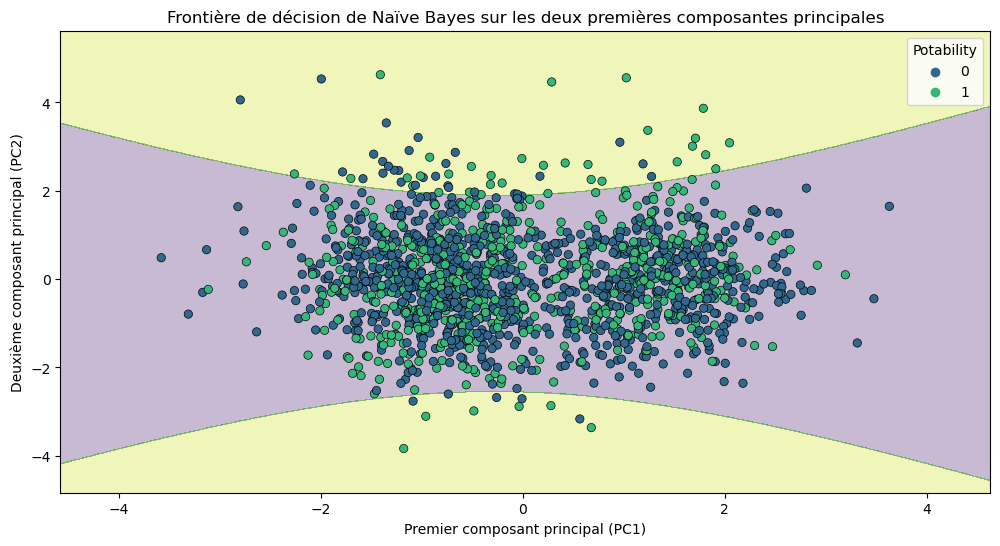

In [9]:
# Appliquer PCA pour réduire à deux dimensions
pca = PCA(n_components=2)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

# Entraîner le classifieur Naïve Bayes sur les données PCA réduites
nb_pca = GaussianNB()
nb_pca.fit(x_pca_train, y_train)

# Tracer la frontière de décision
plt.figure(figsize=(12, 6))
add_decision_boundary(nb_pca, x_pca_train, y_train)
plt.title("Frontière de décision de Naïve Bayes sur les deux premières composantes principales")
plt.xlabel("Premier composant principal (PC1)")
plt.ylabel("Deuxième composant principal (PC2)")
plt.show()
